In [1]:
!pip install pyforest
from pyforest import *
lazy_imports()

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=39cbdc8472b9d7ffea60ab38779ba9013333bbb62a48783e8d71fe64a6453b97
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


['from sklearn.manifold import TSNE',
 'from pyspark import SparkContext',
 'import textblob',
 'import bokeh',
 'import cv2',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import GridSearchCV',
 'import glob',
 'import pickle',
 'from sklearn.linear_model import Lasso',
 'import awswrangler as wr',
 'import sklearn',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn import svm',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import spacy',
 'from fbprophet import Prophet',
 'import nltk',
 'import tensorflow as tf',
 'from sklearn.model_selection import train_test_split',
 'import statistics',
 'import fastai',
 'import skimage',
 'import statsmodels.api as sm',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.ensemble import RandomForestRegressor',
 'from PIL import Image',
 'import seaborn as sns',
 'from skl

In [2]:
df=pd.read_csv('/content/concrete_data.csv')
df.head()

<IPython.core.display.Javascript object>

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [6]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

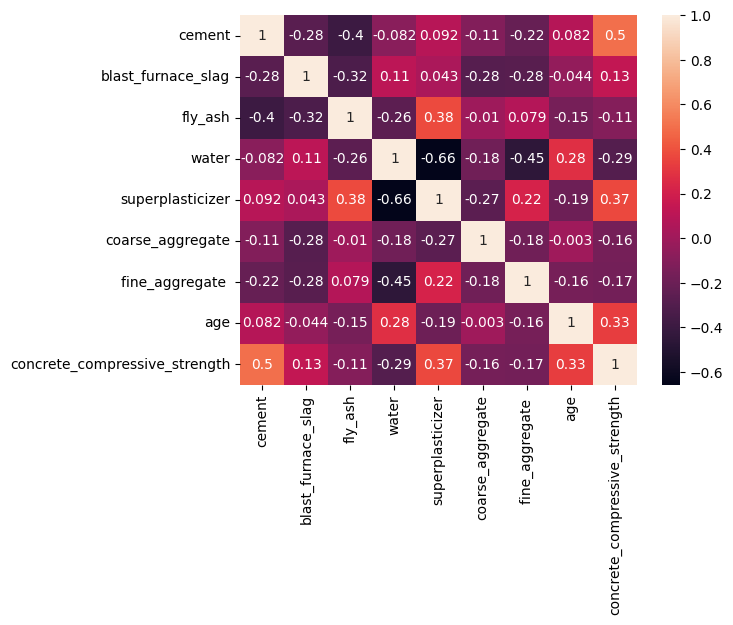

In [7]:
# Higher the value of concrete_compressive_strength more strong concrete we will get.
sns.heatmap(df.corr(),annot=True)
plt.show()

<h5> From the above heatmap where we can see that cement contribute more to concrete_compressive_strength(Output Variable)</h5>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

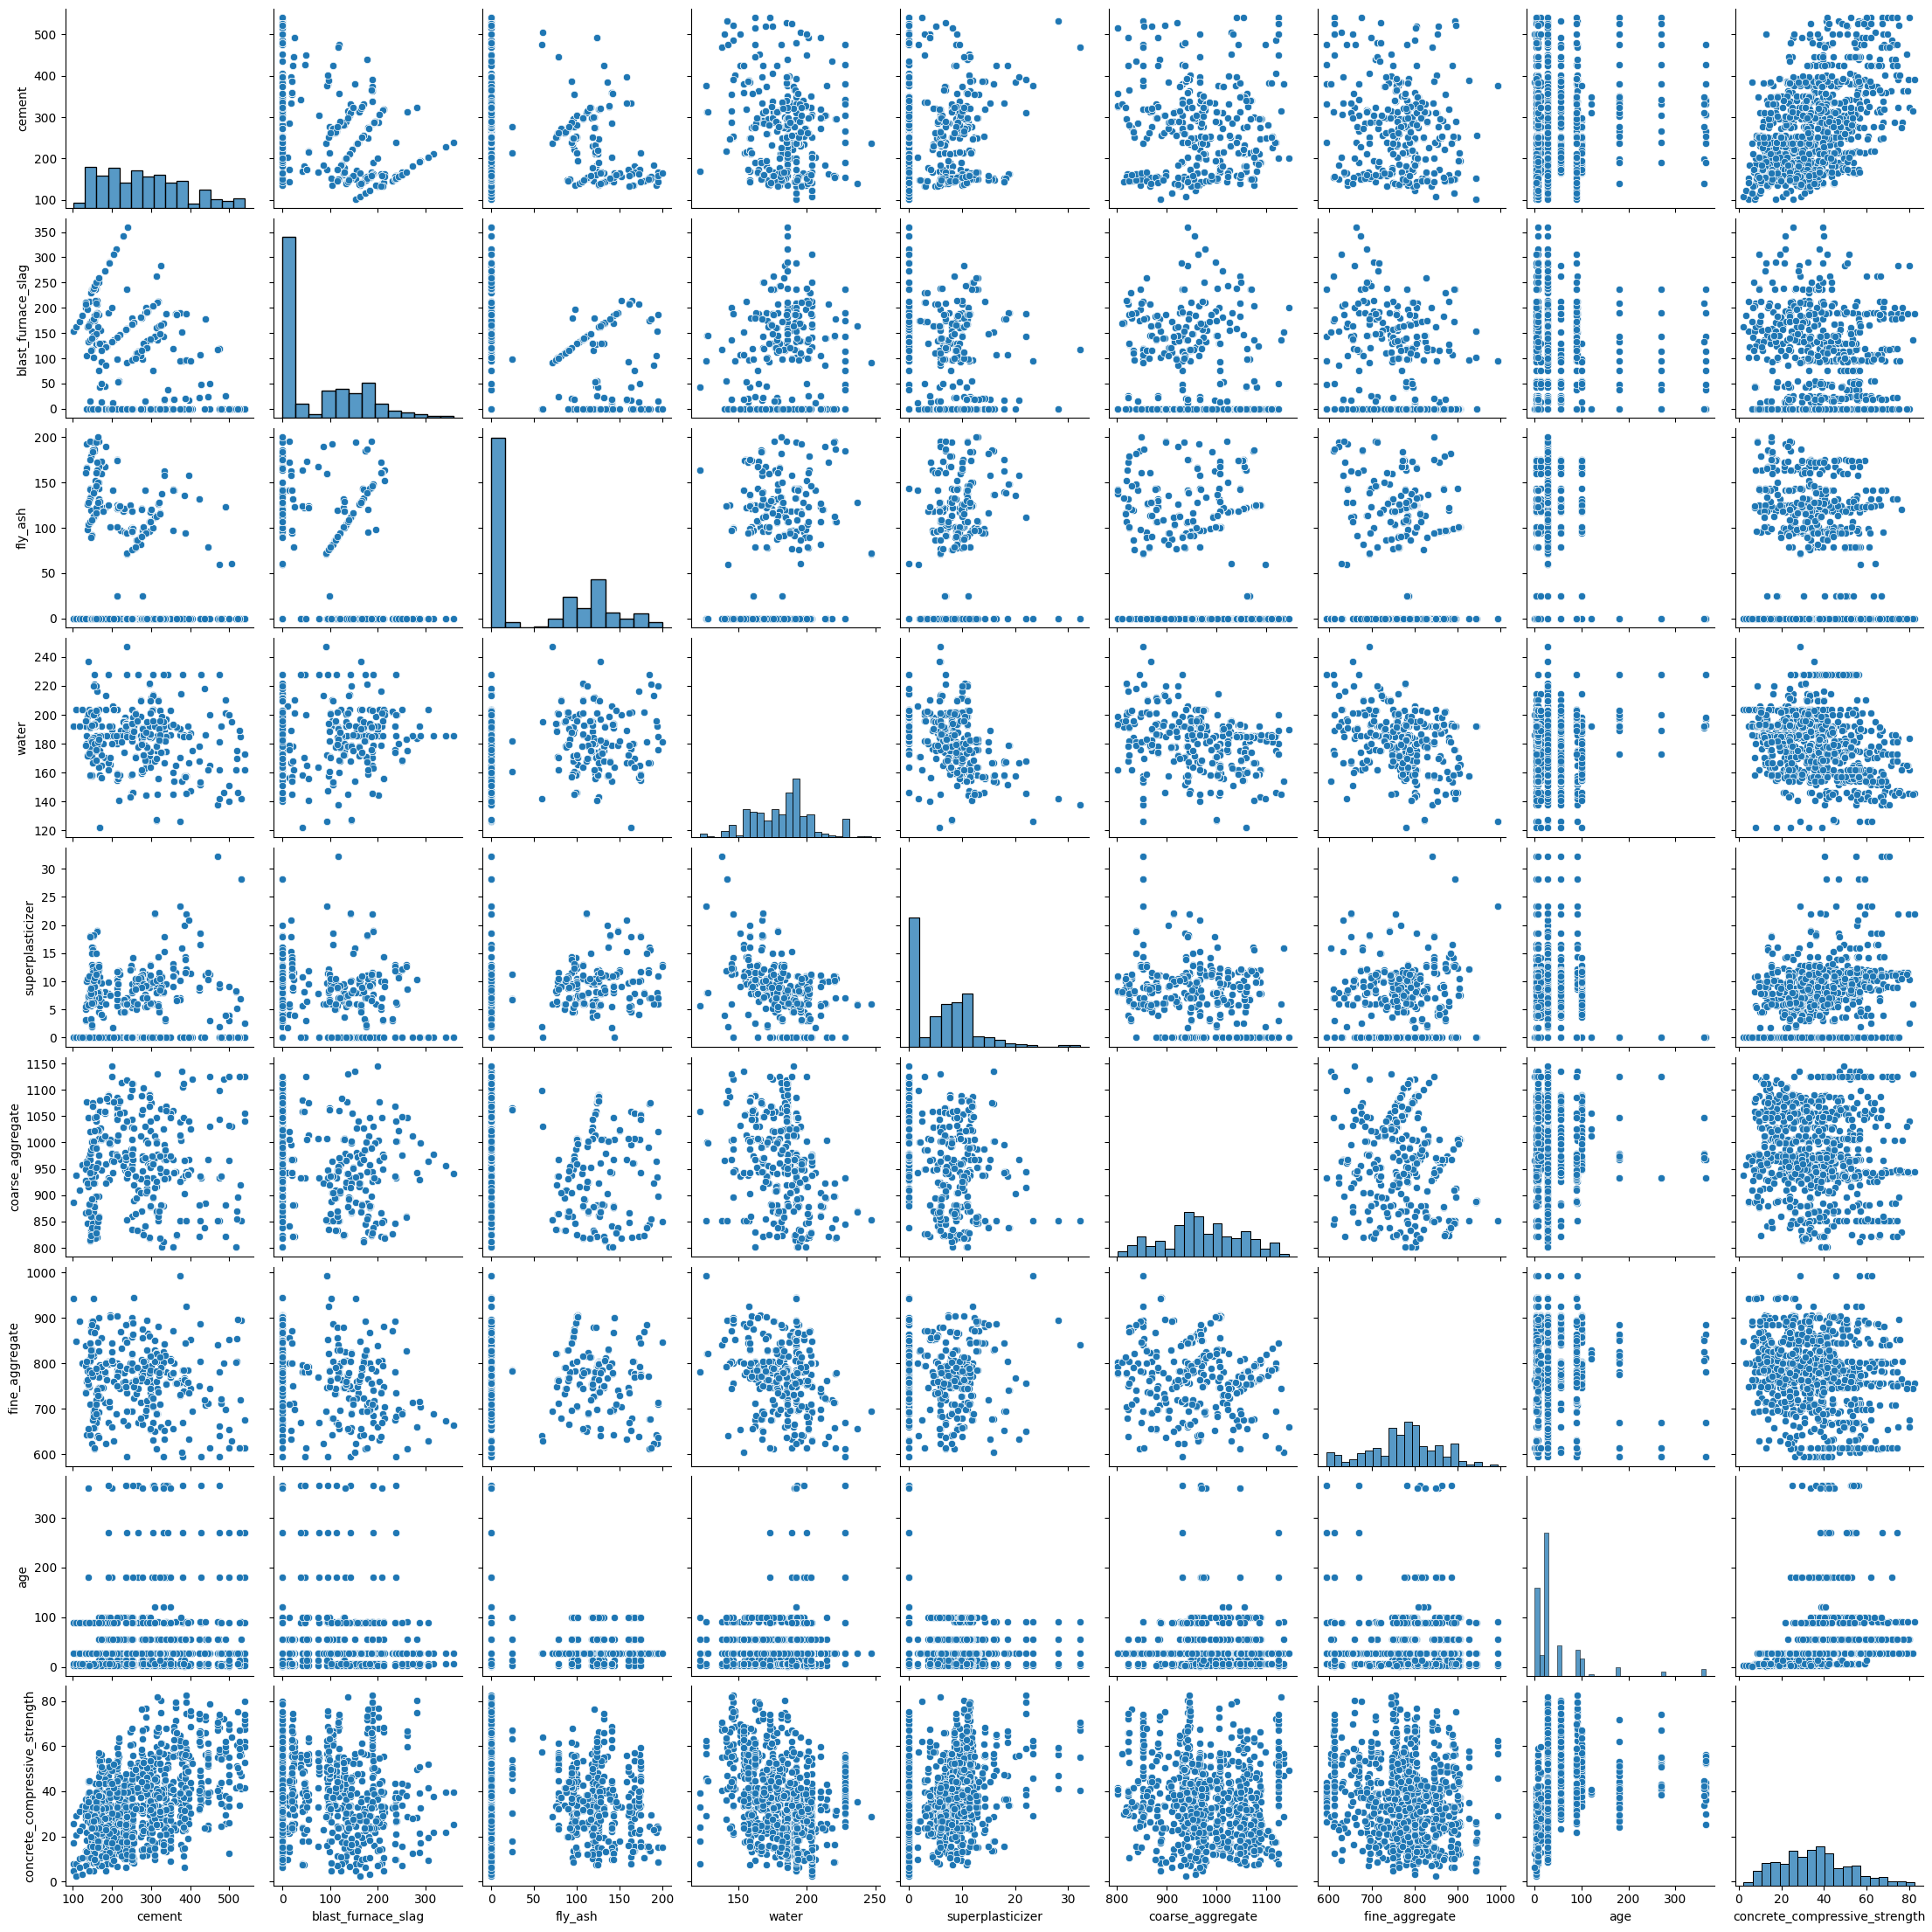

In [8]:
sns.pairplot(df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

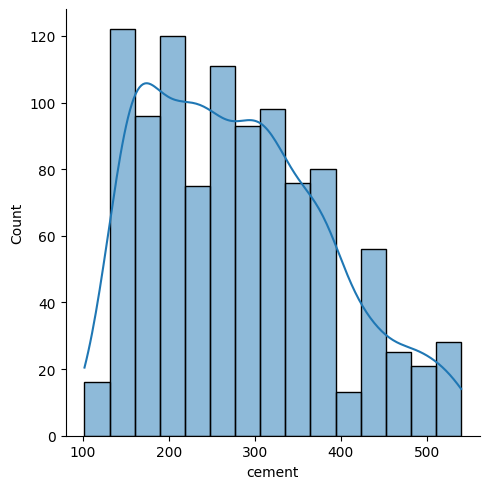

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

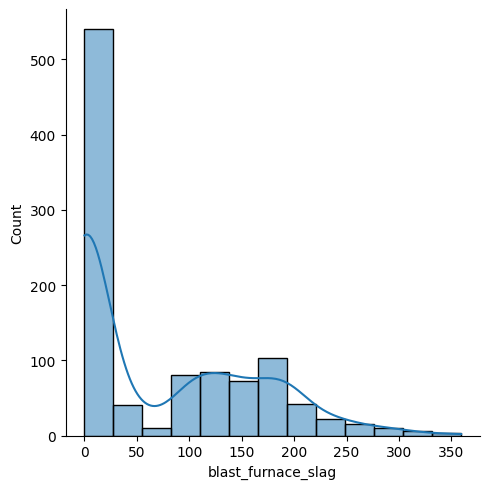

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

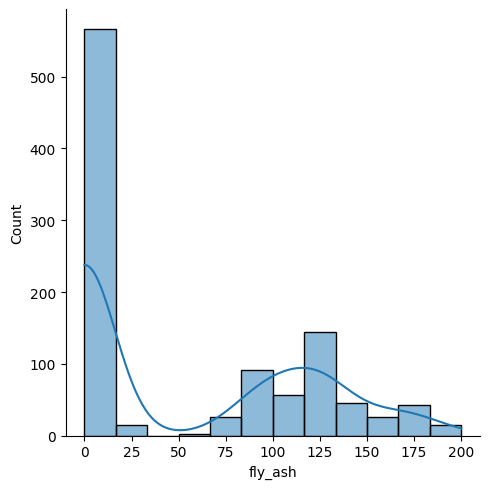

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

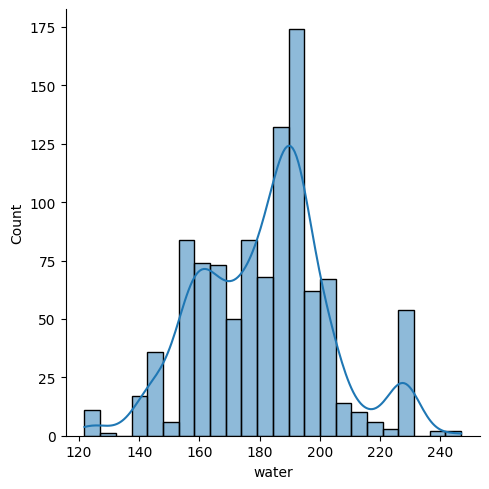

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

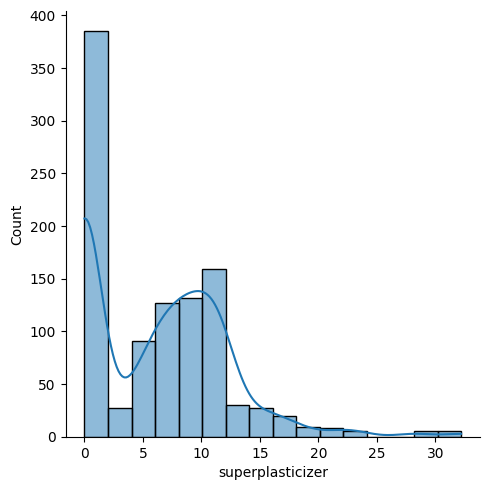

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

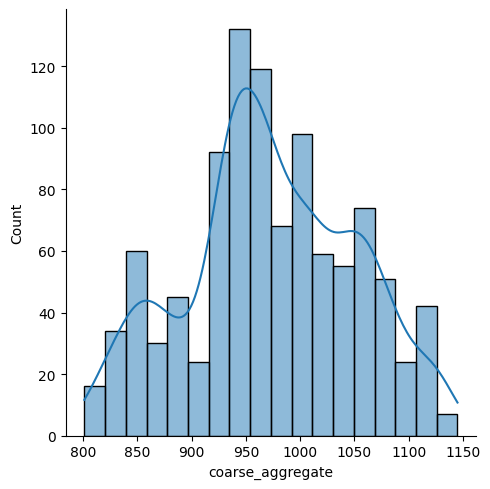

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

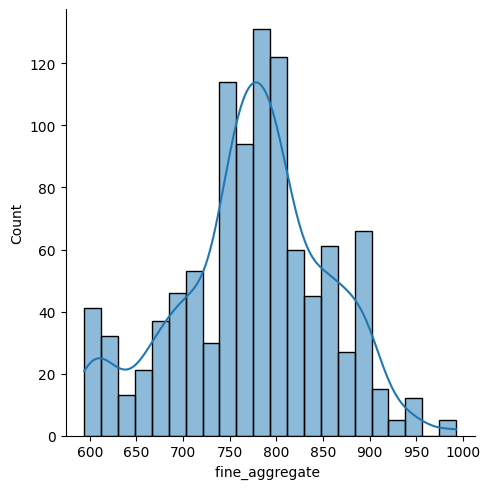

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

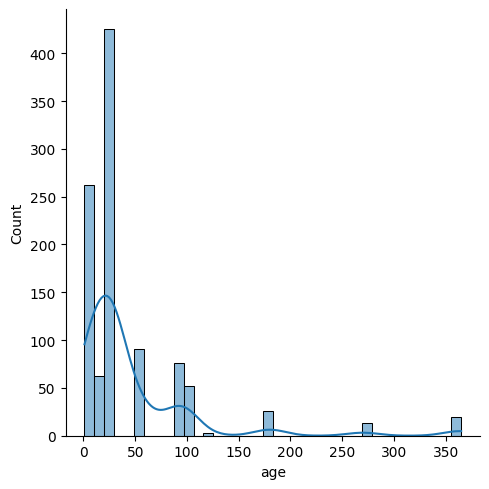

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

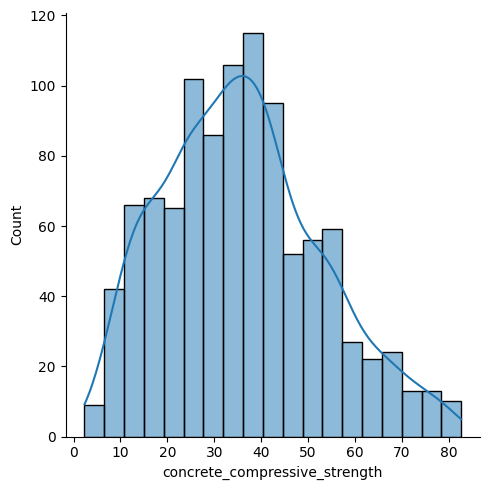

In [9]:
for col in df.columns:
  sns.displot(x=col,data=df,kde=True)
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

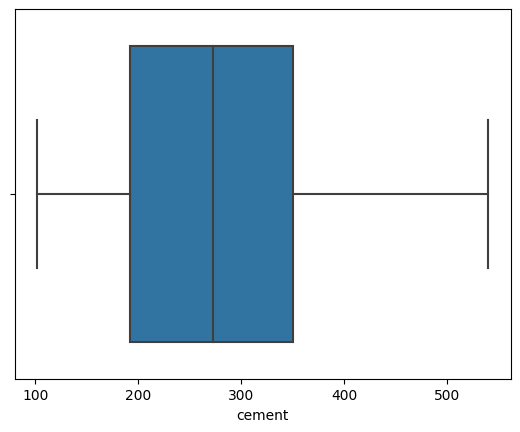

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

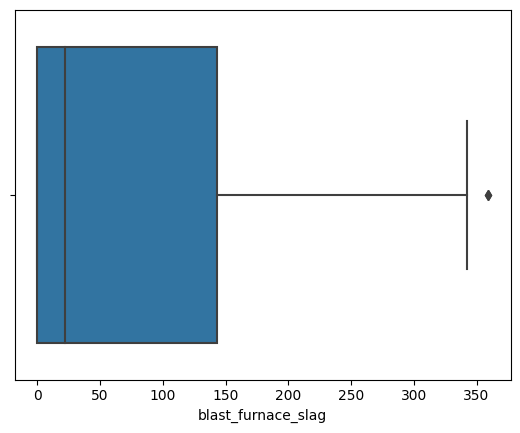

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

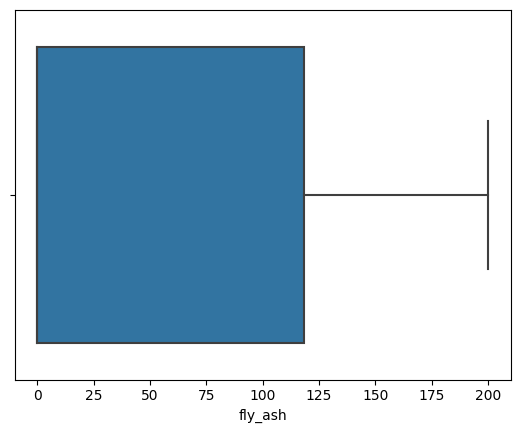

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

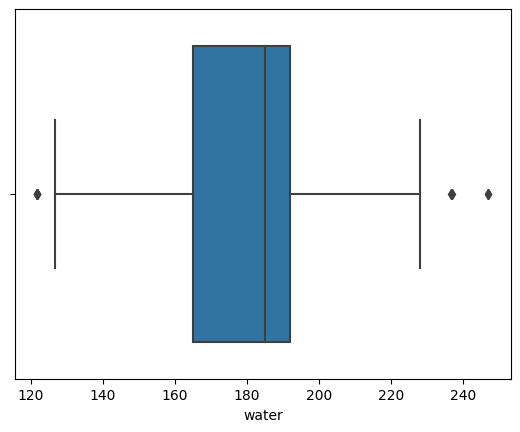

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

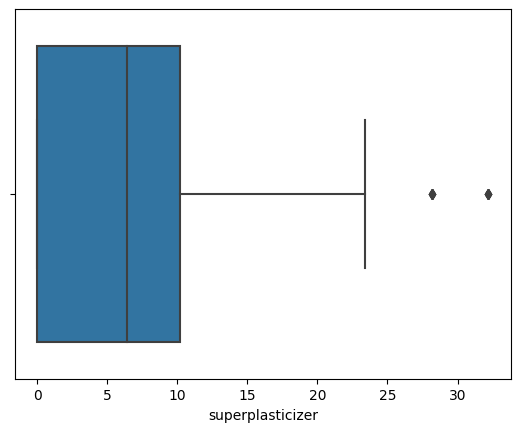

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

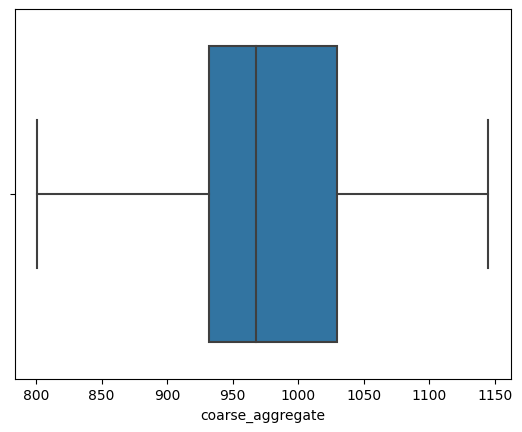

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

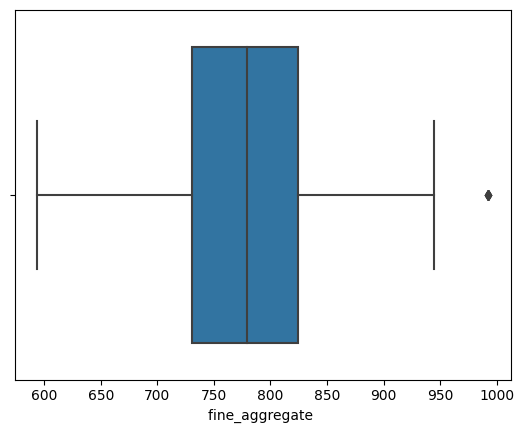

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

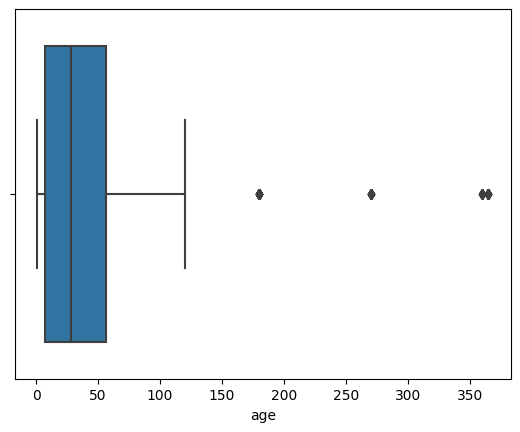

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

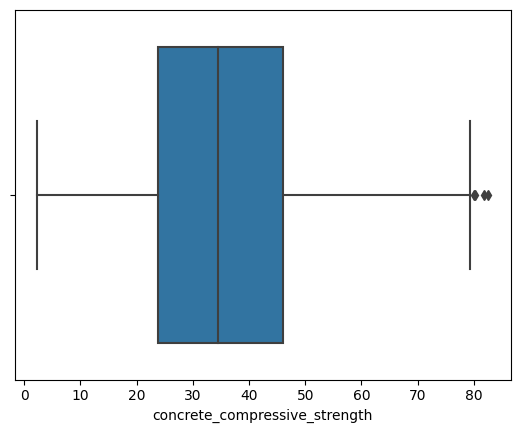

In [10]:
# Any Outliers
for col in df.columns:
  sns.boxplot(x=col,data=df)
  plt.show()

In [11]:
# Handling Outliers
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<Axes: >

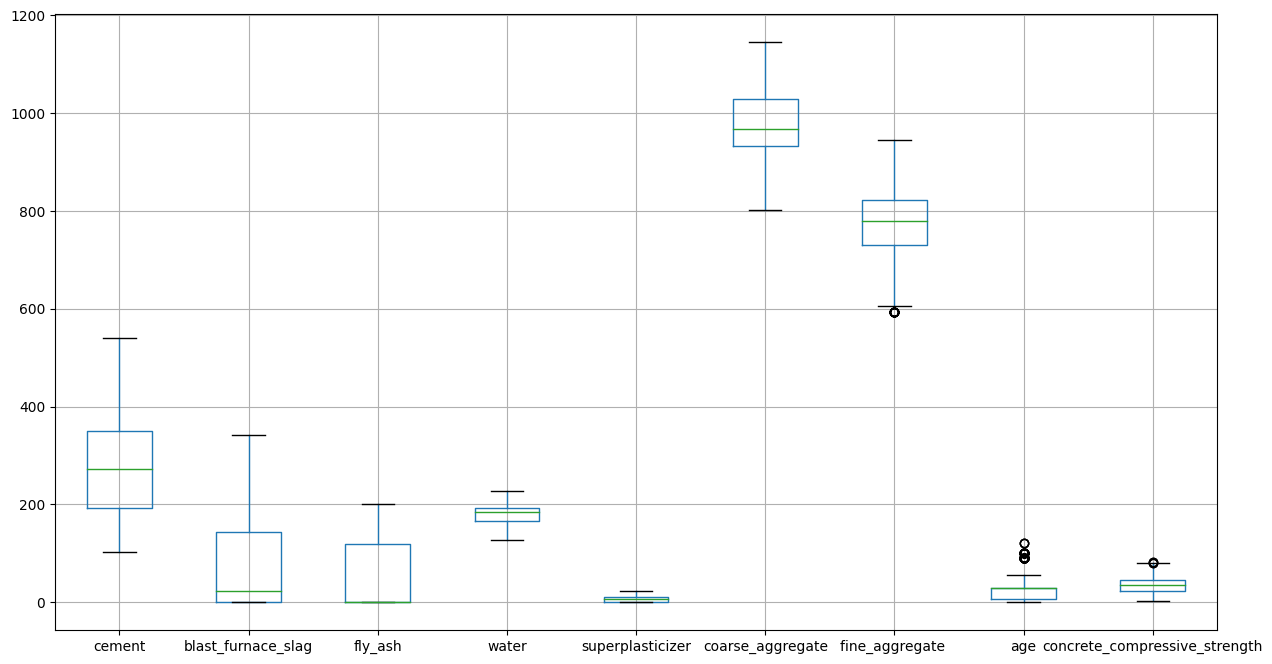

In [12]:
df.boxplot(figsize=(15,8))

In [13]:
# Feature Engineering and Model Building
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [14]:
x=df.drop('concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

In [15]:
# scale the values
from scipy.stats import zscore
x_scaled=x.apply(zscore)
x_scaled.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159


In [16]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<IPython.core.display.Javascript object>

In [17]:
# Model Building
model=RandomForestRegressor()
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [18]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.981963242208528
Testing Score: 0.8820216117146906


In [19]:
y_pred=model.predict(x_test)
r2=metrics.r2_score(y_test,y_pred)
print(r2)

<IPython.core.display.Javascript object>

0.8820216117146906


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

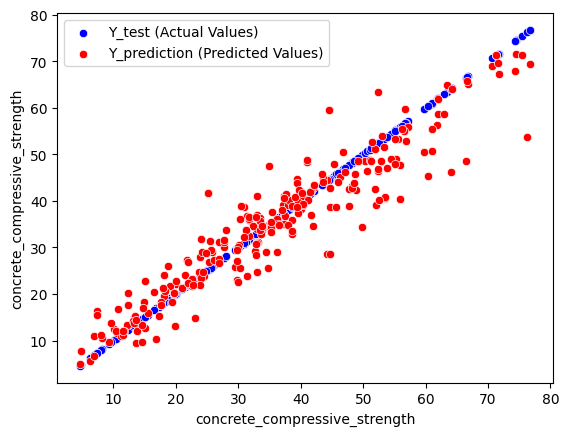

In [20]:
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Y_test (Actual Values)')
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Y_prediction (Predicted Values)')
plt.show()

In [21]:
#Store the accuracy results for each model in a dataframe for final comparison

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': r2},index=[1])
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022


In [22]:
kfold = KFold(n_splits=20)
K_results = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.761910211540565

In [23]:
random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=[2])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910


In [161]:
# Gradient Boosting
model=GradientBoostingRegressor(learning_rate=0.3)
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor(learning_rate=0.3)

In [162]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.9744078627707021
Testing Score: 0.912102177536772


In [26]:
y_pred=model.predict(x_test)
r2=metrics.r2_score(y_test,y_pred)
r2

<IPython.core.display.Javascript object>

0.9121613647331922

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

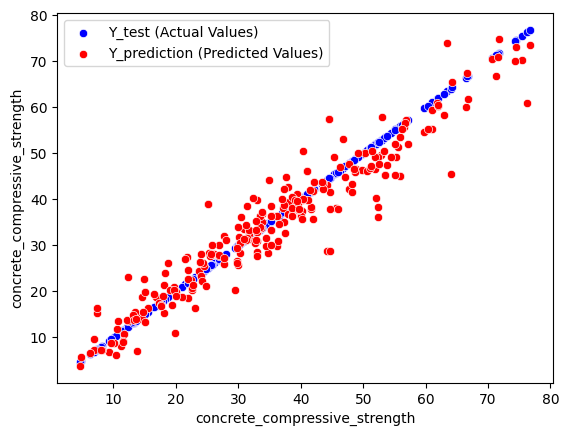

In [27]:
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Y_test (Actual Values)')
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Y_prediction (Predicted Values)')
plt.show()

In [28]:
gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': r2},index=[3])
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161


In [29]:
kfold = KFold(n_splits=25)
results_3 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7924106258998151

In [30]:
gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=[4])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411


In [31]:
# AdaBoosting
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=100,learning_rate=0.9)
model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.9, n_estimators=100)

In [32]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.8263160029726129
Testing Score: 0.7726073653858643


In [33]:
y_pred=model.predict(x_test)
r2=metrics.r2_score(y_test,y_pred)
r2

<IPython.core.display.Javascript object>

0.7726073653858643

In [34]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': r2},index=[5])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607


In [40]:
kfold = KFold(n_splits=20)
results_4 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5927258851453769

In [43]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index=[6])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726


In [50]:
from sklearn.neighbors import KNeighborsRegressor
score=[]
for i in range(1,51):
  mod=KNeighborsRegressor(n_neighbors=i)
  mod.fit(x_train,y_train)
  res=mod.predict(x_test)
  r2=np.mean(res)
  score.append(r2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean score')

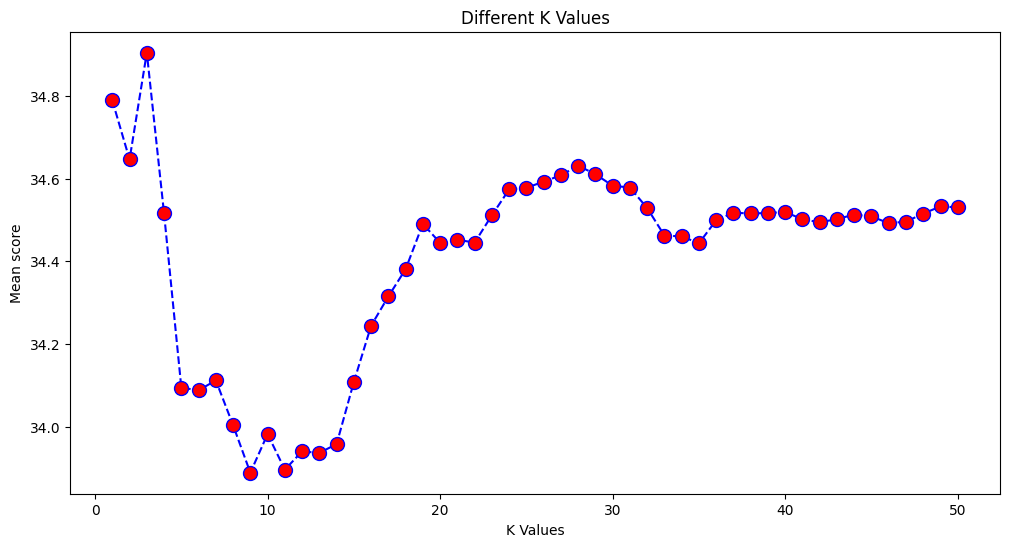

In [52]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51),score,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean score')

In [57]:
model=KNeighborsRegressor(n_neighbors=3,weights='distance')
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [58]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.9933994454659588
Testing Score: 0.7702433403091614


In [60]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7702433403091614

In [62]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index=[7])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243


In [66]:
kfold = KFold(n_splits=20)
results_5 = cross_val_score(model,x, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7223473772088587

In [67]:
KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index=[8])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347


In [119]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(n_estimators=100)
model.fit(x_train,y_train)

BaggingRegressor(n_estimators=100)

In [120]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.9824435769728909
Testing Score: 0.8821218052525232


In [121]:
y_pred=model.predict(x_test)
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

<IPython.core.display.Javascript object>

0.8821218052525232

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

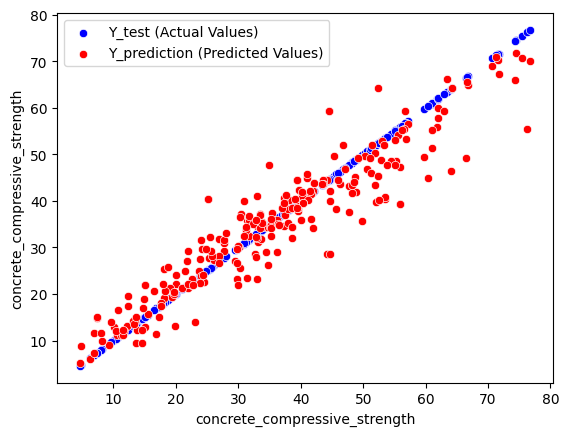

In [128]:
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Y_test (Actual Values)')
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Y_prediction (Predicted Values)')
plt.show()

In [122]:
Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index=[9])
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122


In [126]:
kfold = KFold(n_splits=20)
results_7 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7615797751898591

In [127]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=[10])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122
10,Bagging Regressor k fold,0.761580


In [138]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

In [139]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.7199967987091456
Testing Score: 0.6913843056009883


In [140]:
y_pred=model.predict(x_test)
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.6913843056009883

In [141]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index=[11])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122
10,Bagging Regressor k fold,0.761580


In [143]:
kfold = KFold(n_splits=20)
results_8 = cross_val_score(model,x, y, cv=kfold)
accuracy=np.mean(abs(results_8))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6155301658292511

In [144]:
SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'accuracy': accuracy},index=[12])
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122
10,Bagging Regressor k fold,0.761580


In [173]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators=100,learning_rate=0.1)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [174]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.9863856793170498
Testing Score: 0.9018427388366274


In [177]:
y_pred=model.predict(x_test)
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

<IPython.core.display.Javascript object>

0.9018427388366274

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

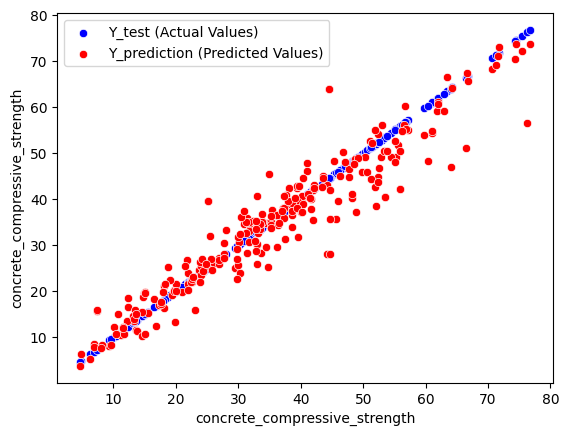

In [178]:
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Y_test (Actual Values)')
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Y_prediction (Predicted Values)')
plt.show()

In [179]:
XGB_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': [acc_XGB]},index=[13])
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122
10,Bagging Regressor k fold,0.761580


In [183]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='absolute_error',)
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [184]:
print('Training Score:',model.score(x_train,y_train))
print('Testing Score:',model.score(x_test,y_test))

Training Score: 0.9927093580053982
Testing Score: 0.7985818688252926


In [185]:
y_pred=model.predict(x_test)
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7985818688252926

In [186]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index=[14])
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122
10,Bagging Regressor k fold,0.761580


In [202]:
kfold = KFold(n_splits=120)
results_9 = cross_val_score(model, x, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.8703953155404345

In [203]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'accuracy': accuracy},index=[15])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882022
2,Random Forest Regressor k_fold,0.761910
3,Gradient Boost Regressor,0.912161
4,Gradient Boost Regressor k fold,0.792411
5,Ada Boost Regressor,0.772607
6,Ada Boost Regressor k fold,0.592726
7,KNN Regressor,0.770243
8,KNN Regressor k fold,0.722347
9,Bagging Regressor,0.882122
10,Bagging Regressor k fold,0.761580
